In [115]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import re

import config_syntheic as config

In [116]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [117]:
def plot_syntheic_load(true_values: any, predicted_values: any, test_data_path: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')
    filename = test_data_path.split('/')[-1].split('.')[0]

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.title(f'Syntheic Data Prediction ({filename})')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [118]:
def plot_syntheic_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [119]:
def plot_syntheic_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [120]:
def plot_syntheic_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [121]:
def plot_syntheic_load_list_by_mean_std_with_labels(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [122]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [123]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [124]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [125]:
def plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list: any, labels: List[str], sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

## Case1

In [126]:
case1_df = load_csv_data(config.case1_predict_results_path)
case1_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531395,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,NaN
4,5,0.624345,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [127]:
case1_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,NaN
39997,19997,NaN,NaN,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,NaN
39998,19998,NaN,NaN,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,NaN
39999,19999,NaN,NaN,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,NaN
40000,20000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [128]:
# true values need to be shifted by 1
true_values = case1_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531395
2        0.562667
3        0.593691
4        0.624345
5        0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [129]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case1_predicted_values = case1_df[predicted_column][config.start:config.end+1]
case1_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
1,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325
2,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625
3,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925
4,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250
...,...,...,...,...,...,...,...,...,...,...
19996,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075
19997,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375
19998,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675
19999,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000


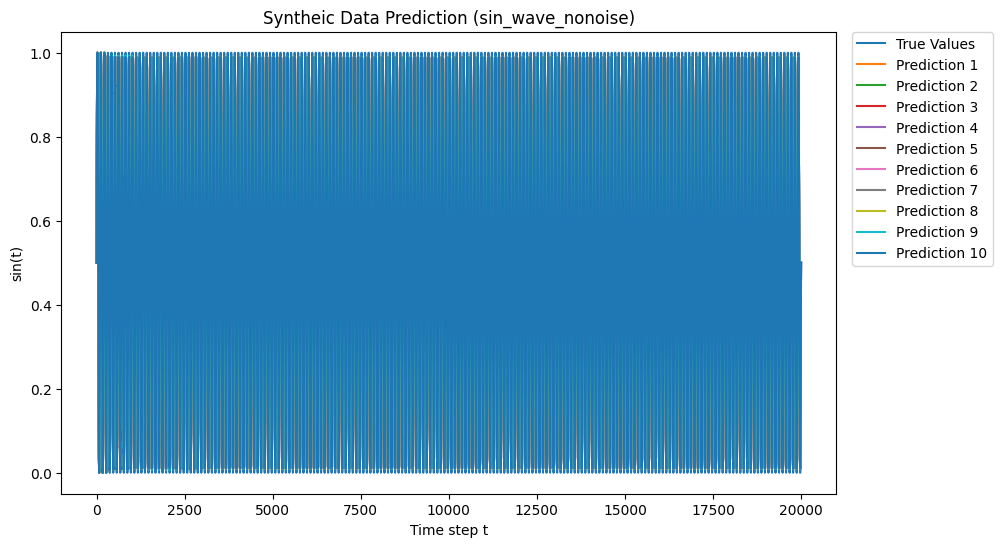

In [130]:
plot_syntheic_load(true_values, case1_predicted_values, config.test_data_path)

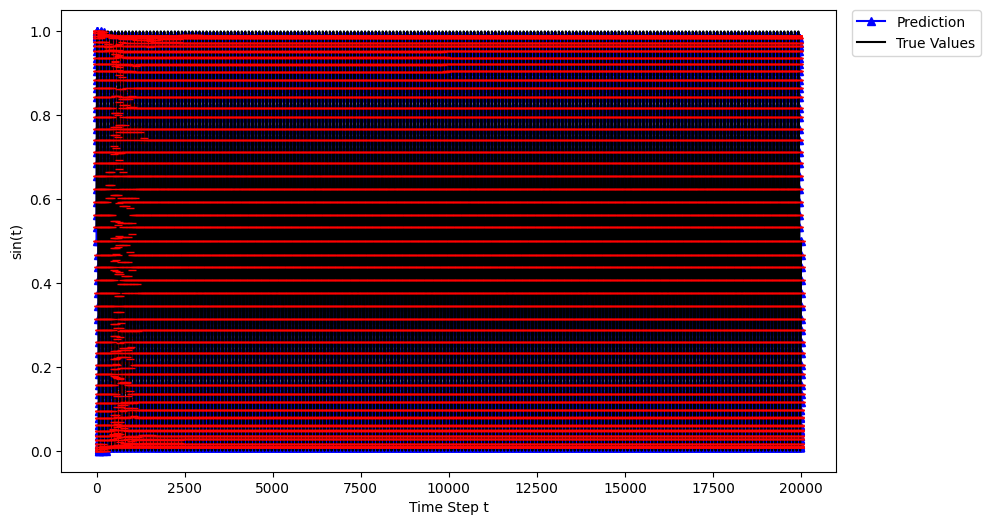

In [131]:
plot_syntheic_load_by_mean_std(true_values, case1_predicted_values, sampling_interval=config.sampling_interval)

In [132]:
# abs(outputdata[n][a] - inputdata[a+1])
case1_error_abs_value = case1_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case1_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395
20002,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167
20003,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191
20004,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845
...,...,...,...,...,...,...,...,...,...,...
39996,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655
39997,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191
39998,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167
39999,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105


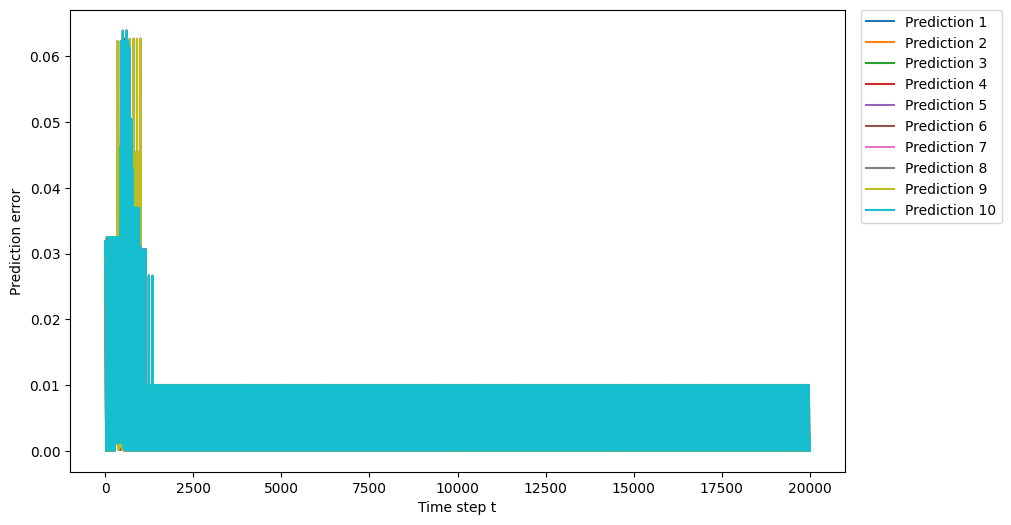

In [133]:
plot_prediction_absolute_error(case1_error_abs_value)

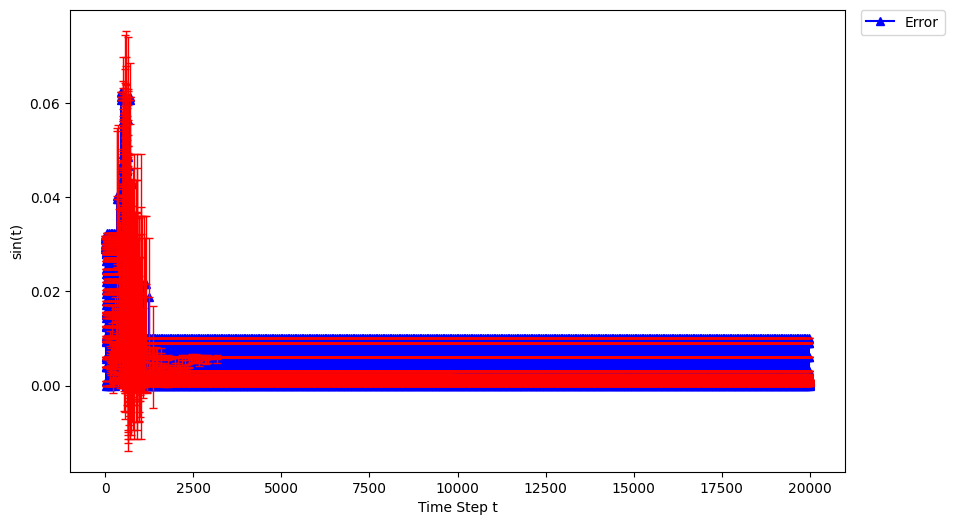

In [134]:
plot_prediction_absolute_error_by_mean_std(case1_error_abs_value, sampling_interval=config.sampling_interval)

## Case2

In [135]:
case2_df = load_csv_data(config.case2_predict_results_path)
case2_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531395,NaN,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,NaN
4,5,0.624345,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [136]:
case2_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,NaN
39997,19997,NaN,NaN,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,NaN
39998,19998,NaN,NaN,0.000167,0.000167,0.000167,0.012667,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,NaN
39999,19999,NaN,NaN,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,NaN
40000,20000,NaN,NaN,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,NaN


In [137]:
# true values need to be shifted by 1
true_values = case2_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531395
2        0.562667
3        0.593691
4        0.624345
5        0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [138]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case2_predicted_values = case2_df[predicted_column][config.start:config.end+1]
case2_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
1,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375,0.5375
2,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625
3,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875,0.5875
4,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250
...,...,...,...,...,...,...,...,...,...,...
19996,0.4125,0.4125,0.4125,0.4125,0.4125,0.4125,0.4125,0.4125,0.4125,0.4125
19997,0.4375,0.4375,0.4375,0.4500,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375
19998,0.4750,0.4750,0.4750,0.4750,0.4750,0.4750,0.4750,0.4750,0.4750,0.4750
19999,0.5125,0.5125,0.5125,0.5125,0.5125,0.5125,0.5125,0.5125,0.5125,0.5125


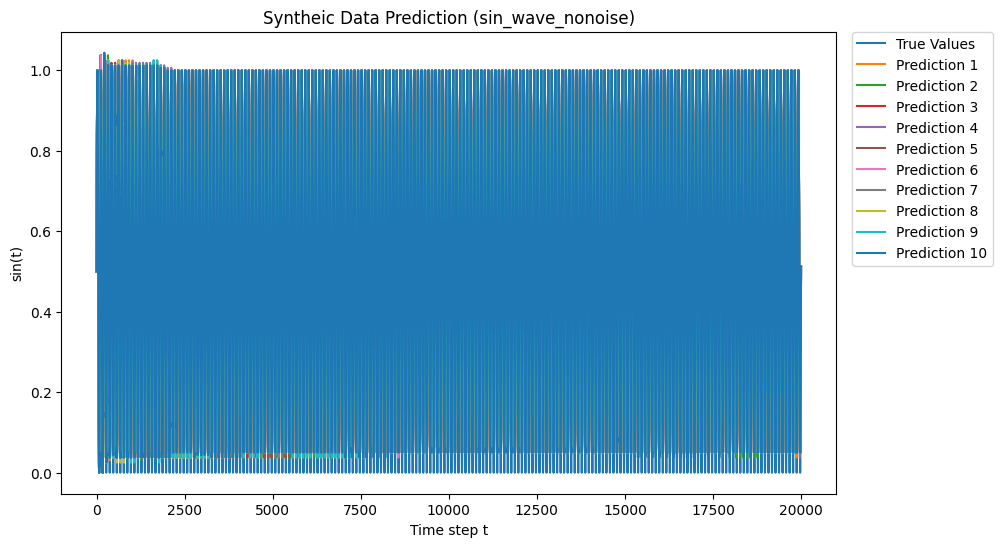

In [139]:
plot_syntheic_load(true_values, case2_predicted_values, config.test_data_path)

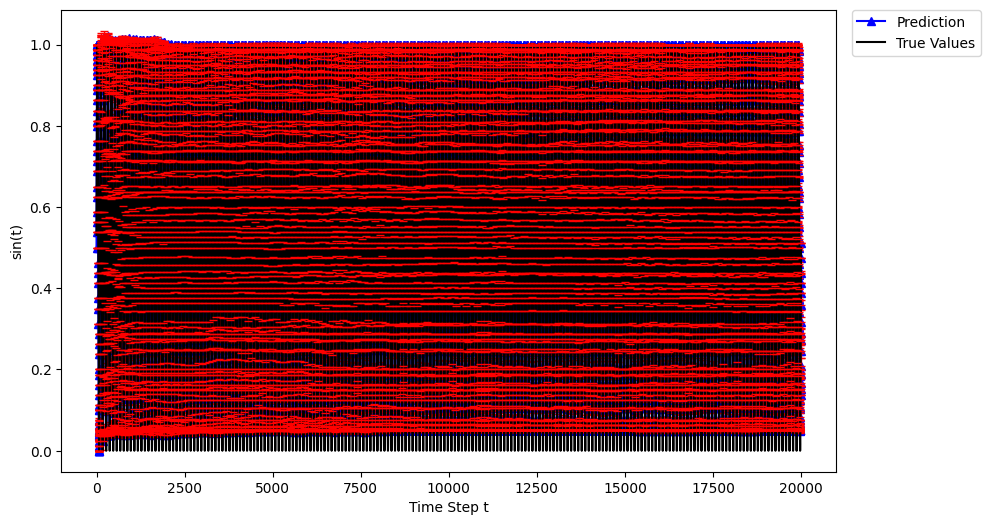

In [140]:
plot_syntheic_load_by_mean_std(true_values, case2_predicted_values, sampling_interval=config.sampling_interval)

In [141]:
# abs(outputdata[n][a] - inputdata[a+1])
case2_error_abs_value = case2_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case2_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395
20002,0.025167,0.025167,0.025167,0.025167,0.025167,0.025167,0.025167,0.025167,0.025167,0.025167
20003,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191
20004,0.036845,0.036845,0.036845,0.036845,0.036845,0.036845,0.036845,0.036845,0.036845,0.036845
...,...,...,...,...,...,...,...,...,...,...
39996,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845,0.011845
39997,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191,0.006191
39998,0.000167,0.000167,0.000167,0.012667,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167
39999,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395,0.006395


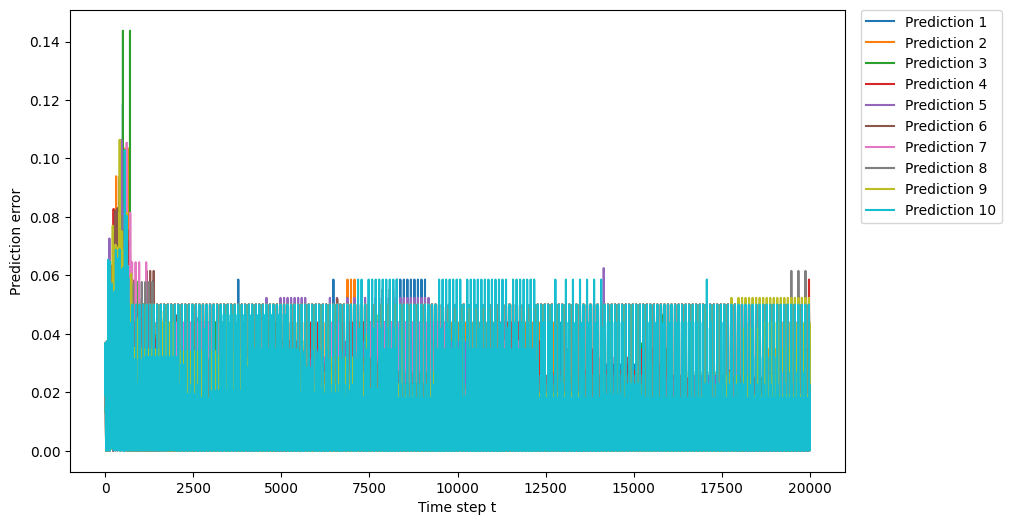

In [142]:
plot_prediction_absolute_error(case2_error_abs_value)

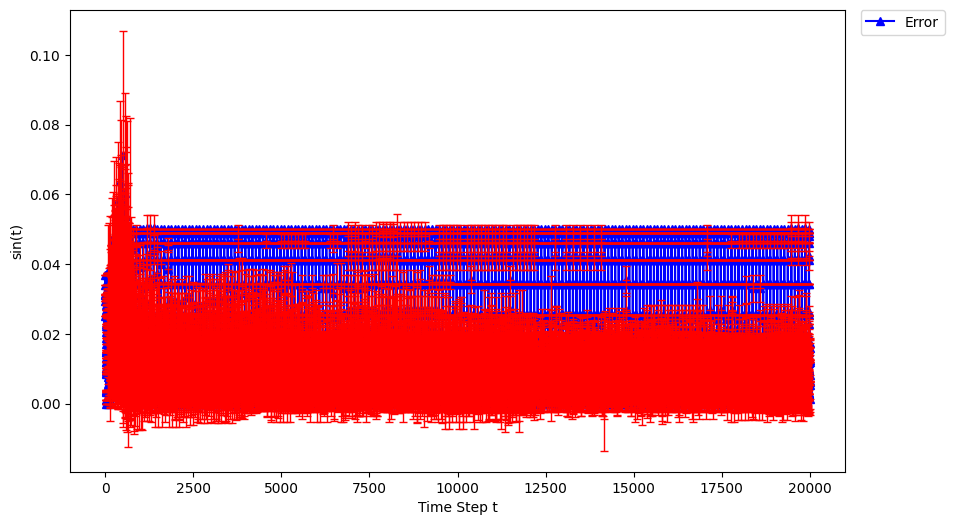

In [143]:
plot_prediction_absolute_error_by_mean_std(case2_error_abs_value, sampling_interval=config.sampling_interval)

## Case 3

In [144]:
case3_df = load_csv_data(config.case3_predict_results_path)
case3_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531395,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,NaN
4,5,0.624345,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [145]:
case3_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,NaN
39997,19997,NaN,NaN,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,NaN
39998,19998,NaN,NaN,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,NaN
39999,19999,NaN,NaN,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,NaN
40000,20000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [146]:
# true values need to be shifted by 1
true_values = case3_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531395
2        0.562667
3        0.593691
4        0.624345
5        0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [147]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case3_predicted_values = case3_df[predicted_column][config.start:config.end+1]
case3_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
1,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325
2,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625
3,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925
4,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250
...,...,...,...,...,...,...,...,...,...,...
19996,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075
19997,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375
19998,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675
19999,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000


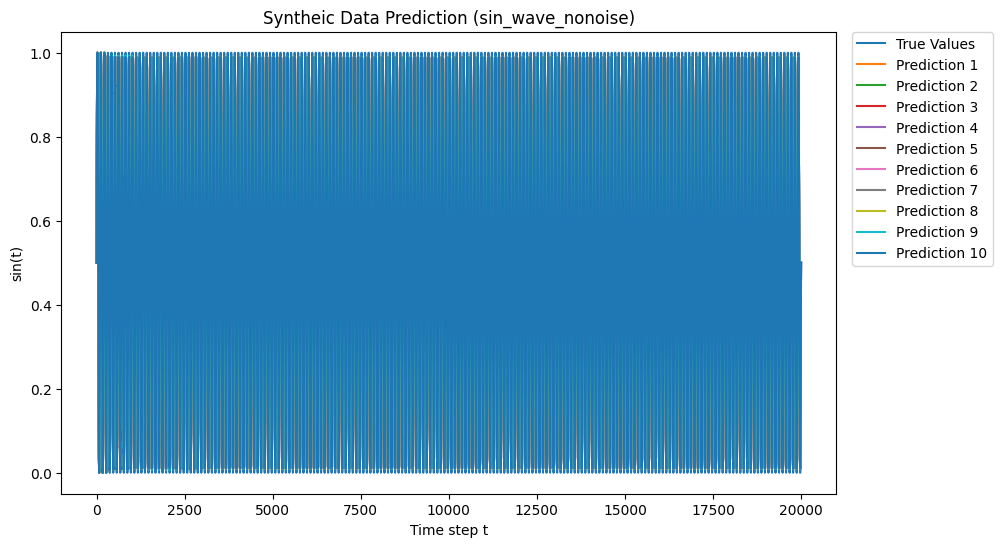

In [148]:
plot_syntheic_load(true_values, case3_predicted_values, config.test_data_path)

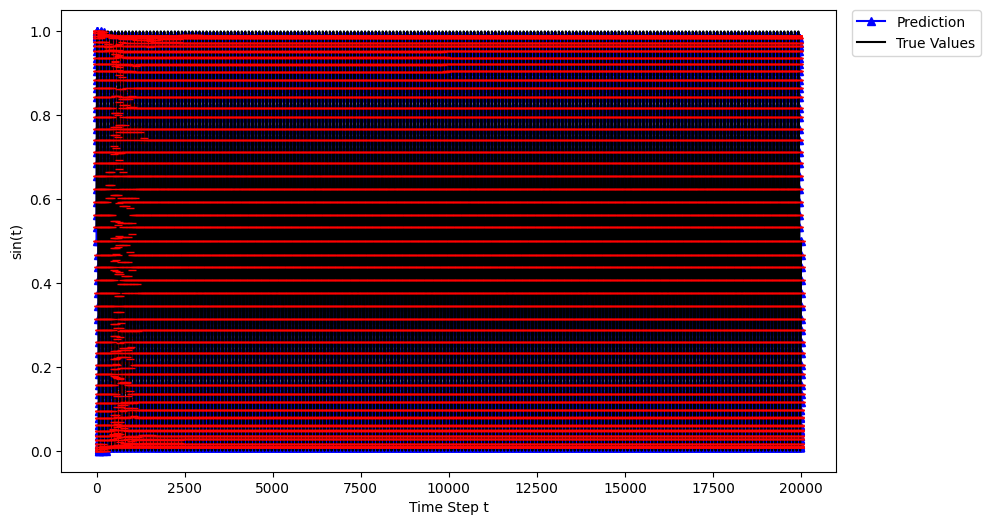

In [149]:
plot_syntheic_load_by_mean_std(true_values, case3_predicted_values, sampling_interval=config.sampling_interval)

In [150]:
# abs(outputdata[n][a] - inputdata[a+1])
case3_error_abs_value = case3_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case3_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395
20002,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167
20003,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191
20004,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845
...,...,...,...,...,...,...,...,...,...,...
39996,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655
39997,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191
39998,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167
39999,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105


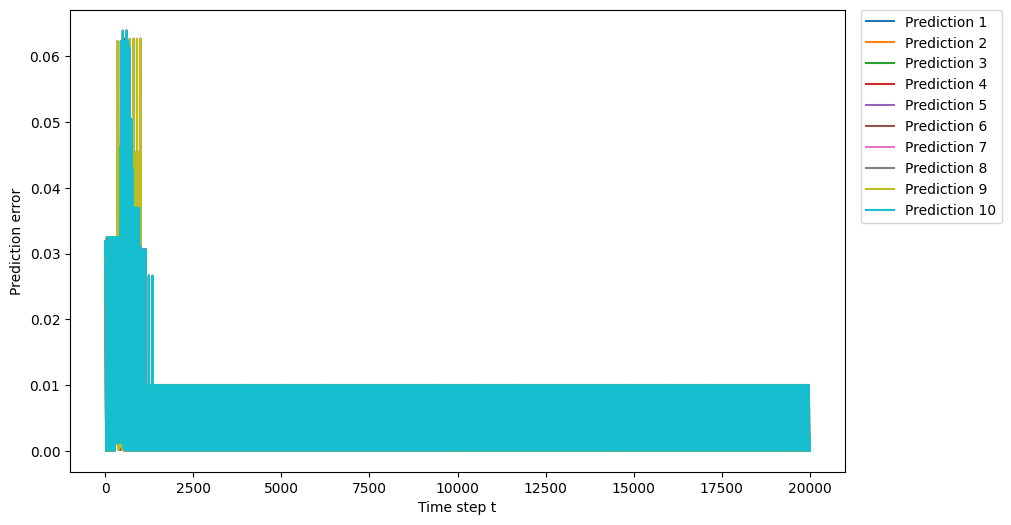

In [151]:
plot_prediction_absolute_error(case3_error_abs_value)

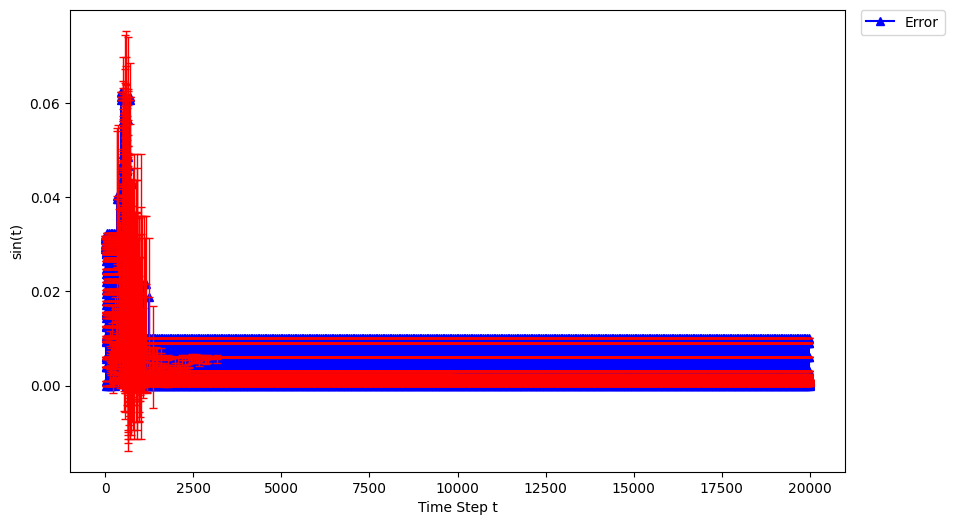

In [152]:
plot_prediction_absolute_error_by_mean_std(case3_error_abs_value, sampling_interval=config.sampling_interval)

## proposed(case4)

In [153]:
case4_df = load_csv_data(config.case4_predict_results_path)
case4_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531395,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,NaN
4,5,0.624345,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [154]:
# true values need to be shifted by 1
true_values = case4_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531395
2        0.562667
3        0.593691
4        0.624345
5        0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [155]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case4_predicted_values = case4_df[predicted_column][config.start:config.end+1]
case4_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
1,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325
2,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625
3,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925
4,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250
...,...,...,...,...,...,...,...,...,...,...
19996,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075
19997,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375
19998,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675
19999,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000


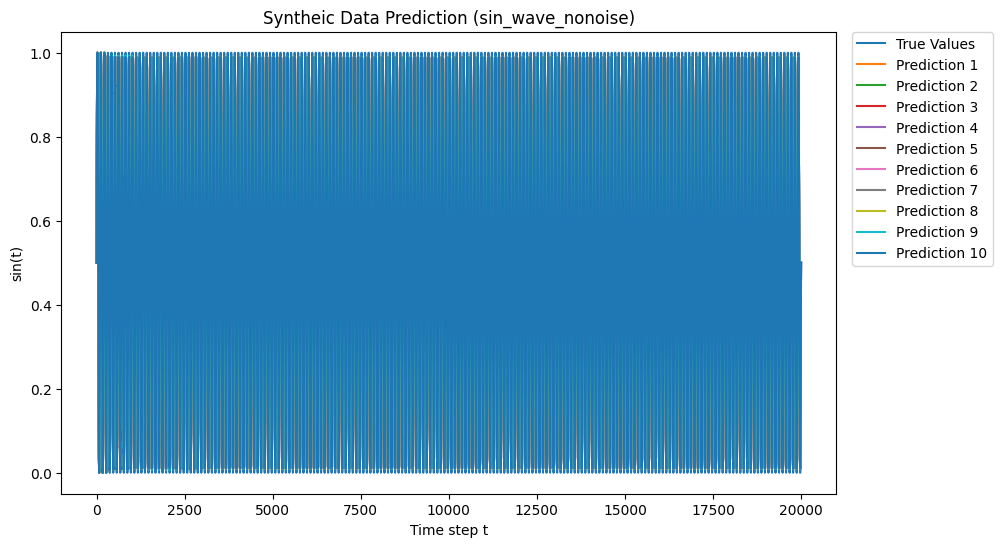

In [156]:
plot_syntheic_load(true_values, case4_predicted_values, config.test_data_path)

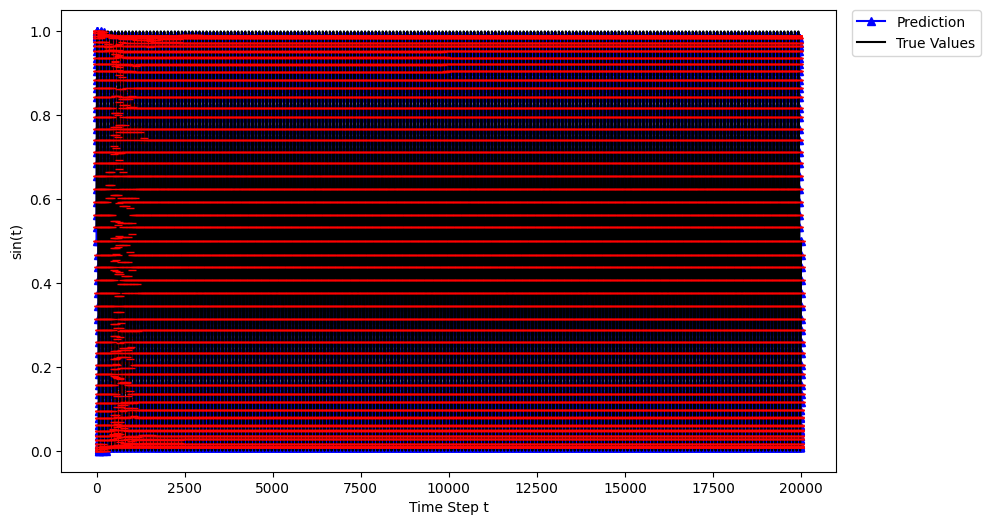

In [157]:
plot_syntheic_load_by_mean_std(true_values, case4_predicted_values, sampling_interval=config.sampling_interval)

In [158]:
# abs(outputdata[n][a] - inputdata[a+1])
case4_error_abs_value = case4_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case4_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395
20002,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167
20003,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191
20004,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845
...,...,...,...,...,...,...,...,...,...,...
39996,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655
39997,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191
39998,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167
39999,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105


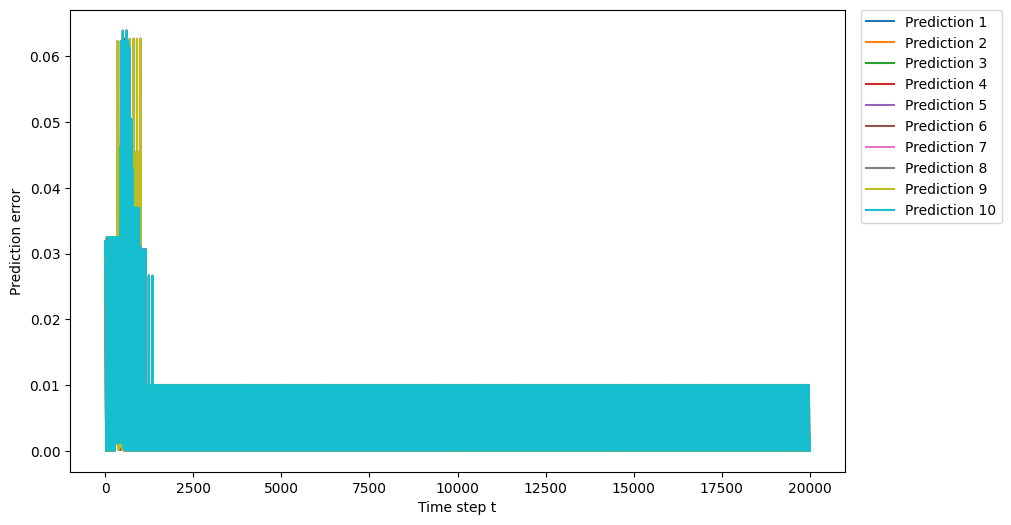

In [159]:
plot_prediction_absolute_error(case4_error_abs_value)

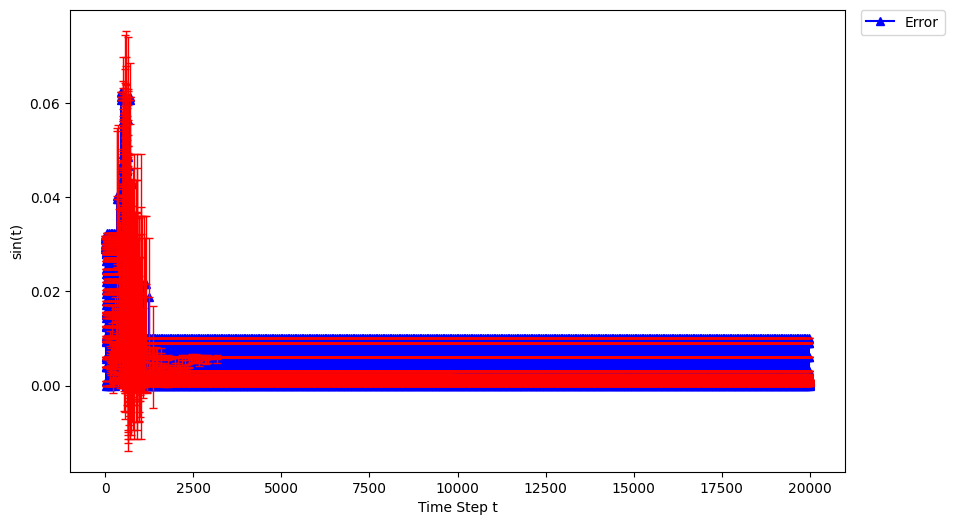

In [160]:
plot_prediction_absolute_error_by_mean_std(case4_error_abs_value, sampling_interval=config.sampling_interval)

## proposed(case5) range 201

In [161]:
case5_df = load_csv_data(config.case5_predict_results_path)
case5_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531395,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,NaN
4,5,0.624345,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [162]:
# true values need to be shifted by 1
true_values = case5_df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531395
2        0.562667
3        0.593691
4        0.624345
5        0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [163]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case5_predicted_values = case5_df[predicted_column][config.start:config.end+1]
case5_predicted_values

,1,2,3,4,5,6,7,8,9,10
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
1,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325
2,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625
3,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925
4,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250
...,...,...,...,...,...,...,...,...,...,...
19996,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075
19997,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375
19998,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675
19999,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000


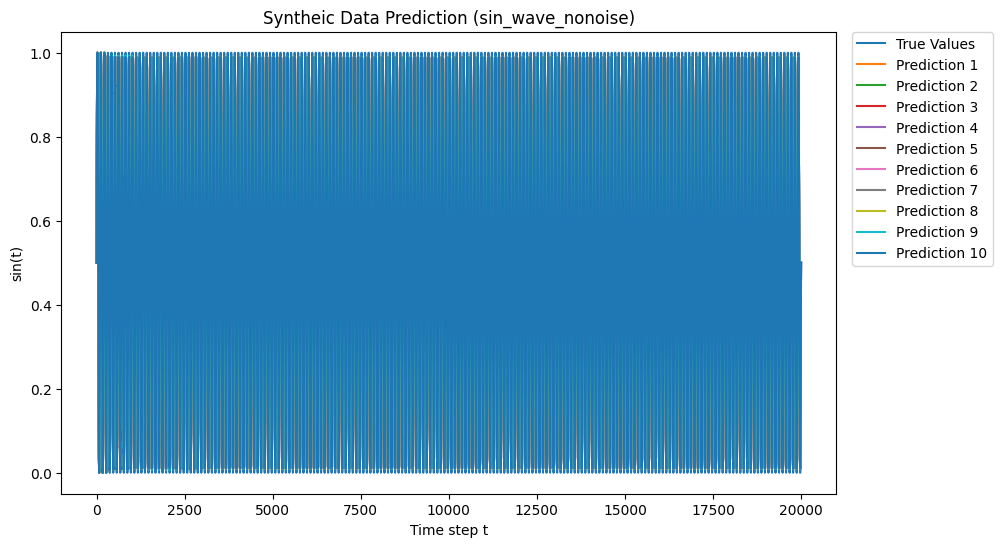

In [164]:
plot_syntheic_load(true_values, case5_predicted_values, config.test_data_path)

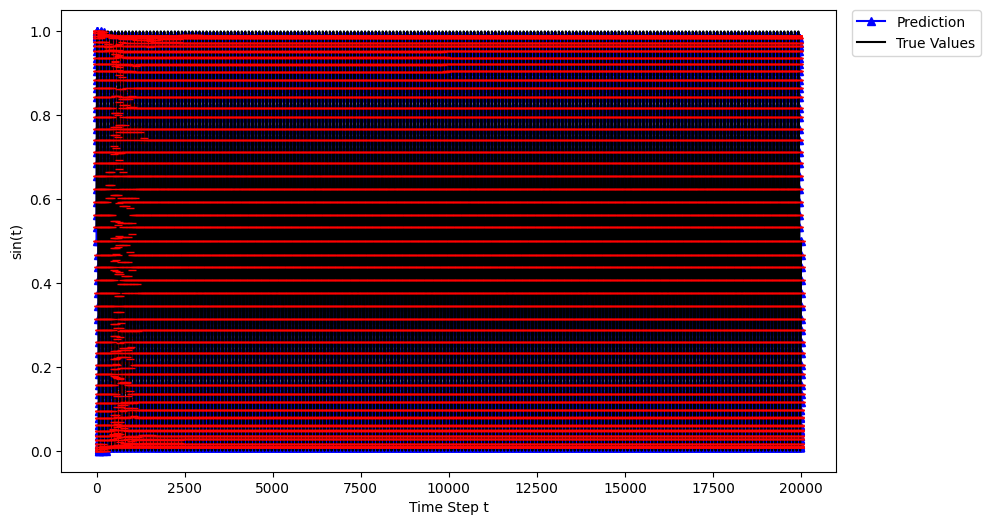

In [165]:
plot_syntheic_load_by_mean_std(true_values, case5_predicted_values, sampling_interval=config.sampling_interval)

In [166]:
# abs(outputdata[n][a] - inputdata[a+1])
case5_error_abs_value = case5_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case5_error_abs_value

,1,2,3,4,5,6,7,8,9,10
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395,0.031395
20002,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167,0.030167
20003,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191,0.031191
20004,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845
...,...,...,...,...,...,...,...,...,...,...
39996,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655
39997,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191
39998,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167
39999,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105


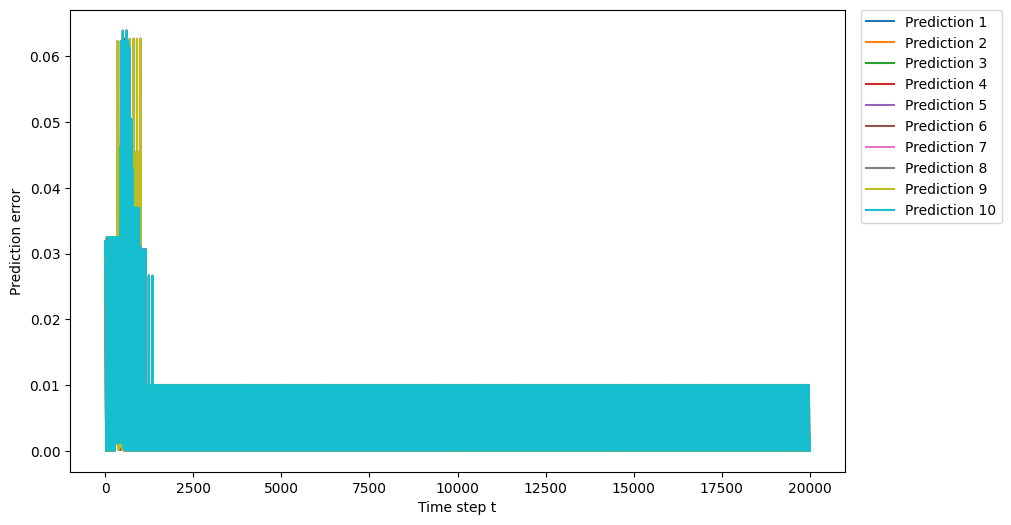

In [167]:
plot_prediction_absolute_error(case5_error_abs_value)

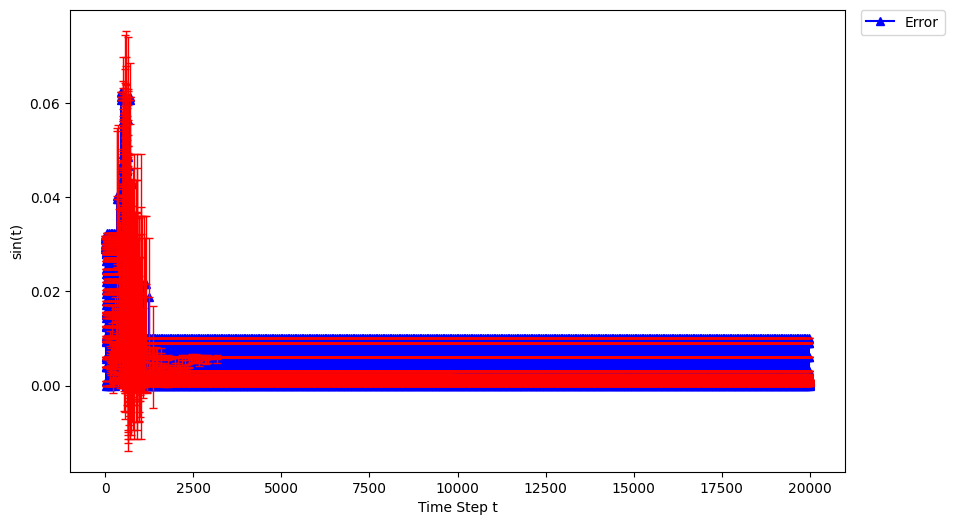

In [168]:
plot_prediction_absolute_error_by_mean_std(case5_error_abs_value, sampling_interval=config.sampling_interval)

# Summary

In [169]:
predicted_values_list = []
error_abs_value_list = []

# The following are the case labels you want to pass
labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5']
# labels = ['Case 2', 'Case 3', 'Case 4']
# labels = ['Case 3', 'Case 4']
# labels = ['Case 1', 'Case 5']
# labels = ['Case 1']

# The following are the case labels you want to pass
predicted_values_list.append(case1_predicted_values)    # Add prediction values for Case 1
predicted_values_list.append(case2_predicted_values)    # Add prediction values for Case 2
predicted_values_list.append(case3_predicted_values)    # Add prediction values for Case 3
predicted_values_list.append(case4_predicted_values)    # Add prediction values for Case 4
predicted_values_list.append(case5_predicted_values)    # Add prediction values for Case 5


error_abs_value_list.append(case1_error_abs_value)      # Add error values for Case 1
error_abs_value_list.append(case2_error_abs_value)      # Add error values for Case 2
error_abs_value_list.append(case3_error_abs_value)      # Add error values for Case 3
error_abs_value_list.append(case4_error_abs_value)      # Add error values for Case 4
error_abs_value_list.append(case5_error_abs_value)      # Add error values for Case 5

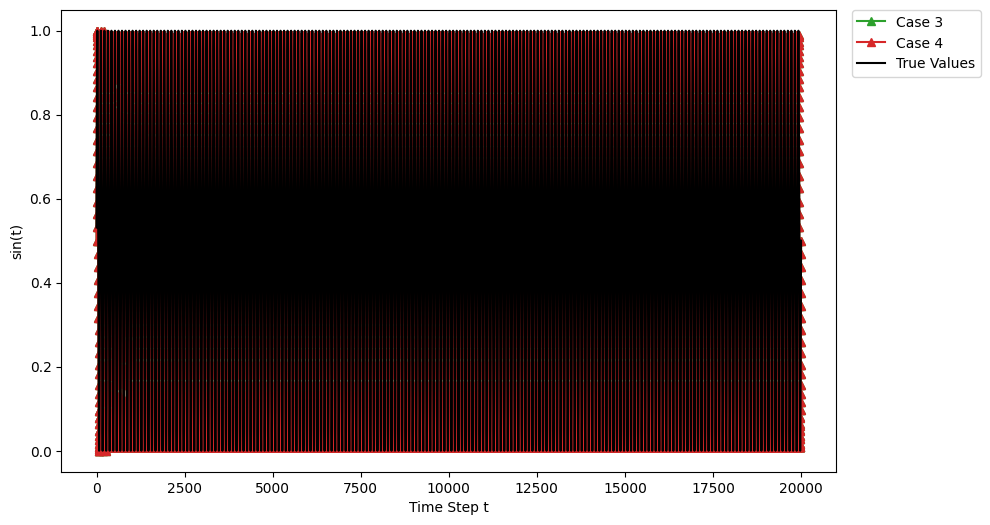

In [170]:
# plot_syntheic_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)
plot_syntheic_load_list_by_mean_std_with_labels(true_values, predicted_values_list, labels=labels, sampling_interval=config.sampling_interval)


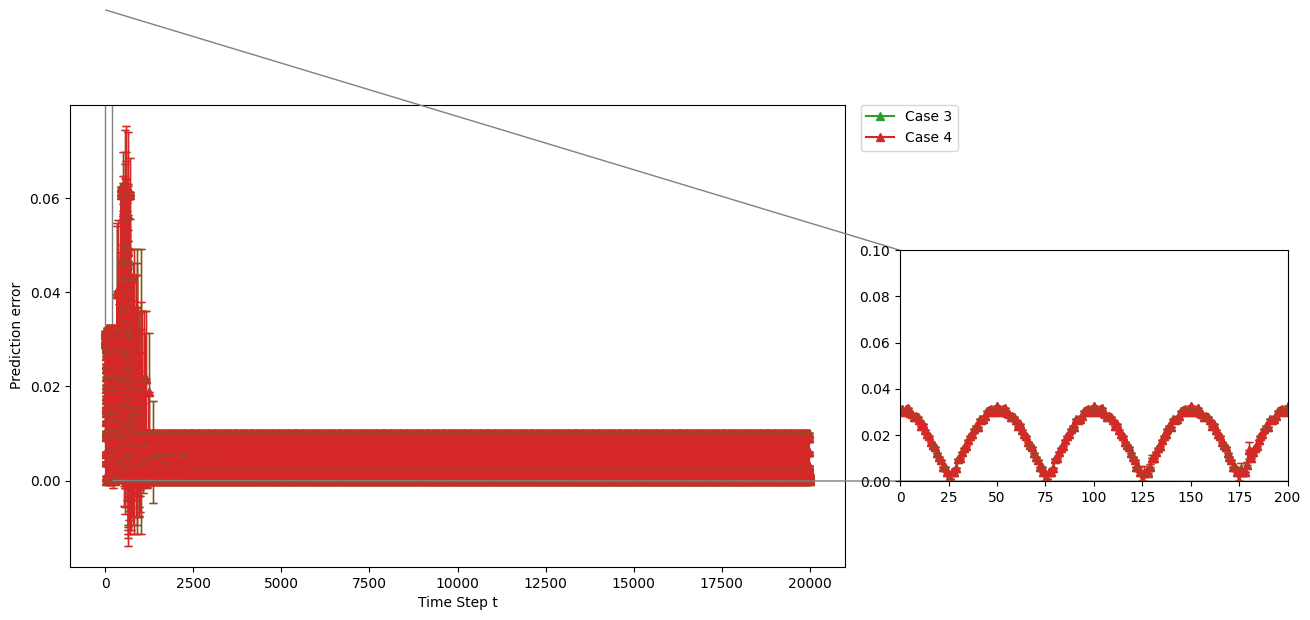

In [171]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)
plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list, labels=labels ,sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)